In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-t8o_sm51
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-t8o_sm51
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=6300672936604973c67119bcf0273dad994a01bef130388d1e88eff9993b3ec9
  Stored in directory: /tmp/pip-ephem-wheel-cache-cqtmb6_c/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyeeg

In [ ]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
#import tensorflow as tf
import time

In [ ]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] #14 Channels chosen to fit Emotiv Epoch+

band = [4,8,12,16,25,45] #5 bands

window_size = 256 #Averaging band power of 2 sec

step_size = 16 #Each 0.125 sec update once

sample_rate = 128 #Sampling rate of 128 Hz

subjectList=[]
for i in range(1,33):
  if i<10:
     subjectList.append(f"{i:02d}")
  else:
    subjectList.append(f"{i:2d}")

print(subjectList)

#List of subjects
path_to_dataset_2 = '/content/drive/MyDrive/Thesis/DEAP-dataset/Datasets/dat_File_Folder/'
path_to_dataset = '/content/drive/MyDrive/Thesis/DEAP-dataset/Datasets/model_5_Khosru/'

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [ ]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


In [ ]:
# restore np.load for future normal usage
np.load = np_load_old

In [ ]:
with open(path_to_dataset + 'data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open(path_to_dataset + 'label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [1]])



Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

for i in range(len(Z)):
  if Z[i] == 9:
    Z[i] = 8.99

In [ ]:
Z.shape

(546560,)

In [ ]:
np.unique(Z)

array([1.  , 1.01, 1.03, 1.05, 1.06, 1.13, 1.17, 1.18, 1.19, 1.23, 1.29,
       1.41, 1.55, 1.68, 1.72, 1.77, 1.78, 1.79, 1.82, 1.85, 1.91, 1.92,
       1.94, 1.95, 1.96, 1.97, 1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06,
       2.08, 2.09, 2.1 , 2.13, 2.14, 2.18, 2.23, 2.24, 2.26, 2.27, 2.32,
       2.35, 2.36, 2.41, 2.5 , 2.51, 2.55, 2.6 , 2.62, 2.69, 2.73, 2.74,
       2.76, 2.77, 2.78, 2.79, 2.81, 2.82, 2.83, 2.85, 2.87, 2.88, 2.9 ,
       2.91, 2.92, 2.94, 2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04,
       3.05, 3.06, 3.08, 3.09, 3.1 , 3.12, 3.13, 3.14, 3.15, 3.17, 3.19,
       3.23, 3.24, 3.26, 3.28, 3.29, 3.31, 3.32, 3.35, 3.37, 3.38, 3.44,
       3.45, 3.46, 3.47, 3.49, 3.53, 3.54, 3.6 , 3.62, 3.63, 3.64, 3.68,
       3.69, 3.71, 3.73, 3.74, 3.77, 3.78, 3.79, 3.81, 3.82, 3.83, 3.85,
       3.86, 3.87, 3.88, 3.9 , 3.91, 3.92, 3.94, 3.95, 3.96, 3.97, 3.99,
       4.  , 4.01, 4.03, 4.04, 4.05, 4.06, 4.08, 4.09, 4.1 , 4.12, 4.13,
       4.14, 4.15, 4.17, 4.21, 4.22, 4.23, 4.24, 4.

In [ ]:

count_0 = 0
count_1 = 0
for i in range(len(Z)):
  if Z[i] >= 1 and Z[i]<=4.99:
    Z [i] = 0
    count_0 = count_0 + 1
  else:
    Z [i] = 1
    count_1 = count_1 + 1
print(count_0,count_1)
   
  
  

224602 321958


In [ ]:
np.unique(Z)

array([0., 1.])

In [ ]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
x_train = np.array(X[:])

In [ ]:
with open(path_to_dataset + 'data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open(path_to_dataset + 'label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [1]])


Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

for i in range(len(L)):
  if L[i] == 9:
    L[i] = 8.99

In [ ]:
np.unique(L)

array([1.  , 1.01, 1.03, 1.05, 1.06, 1.13, 1.17, 1.18, 1.19, 1.23, 1.29,
       1.41, 1.55, 1.68, 1.72, 1.77, 1.78, 1.79, 1.82, 1.85, 1.91, 1.92,
       1.94, 1.95, 1.96, 1.97, 1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06,
       2.08, 2.09, 2.1 , 2.13, 2.14, 2.18, 2.23, 2.24, 2.26, 2.27, 2.32,
       2.35, 2.36, 2.41, 2.5 , 2.51, 2.55, 2.6 , 2.62, 2.69, 2.73, 2.74,
       2.76, 2.77, 2.78, 2.79, 2.81, 2.82, 2.83, 2.85, 2.87, 2.88, 2.9 ,
       2.91, 2.92, 2.94, 2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04,
       3.05, 3.06, 3.08, 3.09, 3.1 , 3.12, 3.13, 3.14, 3.15, 3.17, 3.19,
       3.23, 3.24, 3.26, 3.28, 3.29, 3.31, 3.32, 3.35, 3.37, 3.38, 3.44,
       3.45, 3.46, 3.47, 3.49, 3.53, 3.54, 3.6 , 3.62, 3.63, 3.64, 3.68,
       3.69, 3.71, 3.73, 3.74, 3.77, 3.78, 3.79, 3.81, 3.82, 3.83, 3.85,
       3.86, 3.87, 3.88, 3.9 , 3.91, 3.92, 3.94, 3.95, 3.96, 3.97, 3.99,
       4.  , 4.01, 4.03, 4.04, 4.05, 4.06, 4.08, 4.09, 4.1 , 4.12, 4.13,
       4.14, 4.15, 4.17, 4.21, 4.22, 4.23, 4.24, 4.

In [ ]:

count_0 = 0
count_1 = 0
for i in range(len(L)):
  if L[i] >= 1 and L[i]<=4.99:
    L [i] = 0
    count_0 = count_0 + 1
  else:
    L [i] = 1
    count_1 = count_1 + 1
print(count_0,count_1)

32086 45994


In [ ]:
np.unique(L)

array([0., 1.])

In [ ]:
L.shape

(78080,)

In [ ]:
x_test = np.array(M[:])
x_test

array([[0.07006464, 0.10438554, 0.06634758, ..., 0.10698754, 0.14264875,
        0.12007955],
       [0.07546743, 0.08606705, 0.07999725, ..., 0.12147734, 0.13970255,
        0.12824657],
       [0.11370435, 0.09387804, 0.07056466, ..., 0.11339237, 0.11484593,
        0.10770615],
       ...,
       [0.17484635, 0.1135094 , 0.05917121, ..., 0.03334964, 0.05135839,
        0.07198122],
       [0.20681713, 0.10186689, 0.0540274 , ..., 0.02499636, 0.05249084,
        0.05879238],
       [0.17817637, 0.08834064, 0.05389381, ..., 0.03475489, 0.05801423,
        0.06873259]])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(L)
y_test[9000:9000+10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test[54000:54000+10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train

array([[-0.6096222 ,  0.4454781 ,  0.38842314, ...,  2.31542239,
         1.98269818,  0.07719224],
       [-0.55355347,  0.67515699,  0.65468289, ...,  2.89728042,
         2.14482451, -0.01554408],
       [-0.48842121,  0.8307996 ,  0.33902892, ...,  2.28143125,
         2.23648915, -0.14332548],
       ...,
       [-0.04832992,  0.37367094,  0.2050156 , ..., -0.51608802,
        -0.22210637, -0.55805544],
       [-0.57760154, -0.68762598, -0.24122468, ..., -0.2710515 ,
         0.08612109, -0.53604208],
       [-0.64006776, -0.68538145, -0.28867814, ..., -0.52404566,
         0.22677658, -0.45508198]])

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape

(546560, 70, 1)

In [ ]:
x_train.shape

(546560, 70, 1)

In [ ]:
batch_size = 256
num_classes = 2
epochs = 50
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(70, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

##Model 5

In [ ]:
model = Sequential()

intput_shape=(x_train.shape[1], 1)

model.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 70, 1024)          10240     
_________________________________________________________________
batch_normalization_4 (Batch (None, 70, 1024)          4096      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 35, 1024)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 35, 512)           3146240   
_________________________________________________________________
batch_normalization_5 (Batch (None, 35, 512)           2048      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 17, 512)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 17, 256)          

In [ ]:

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

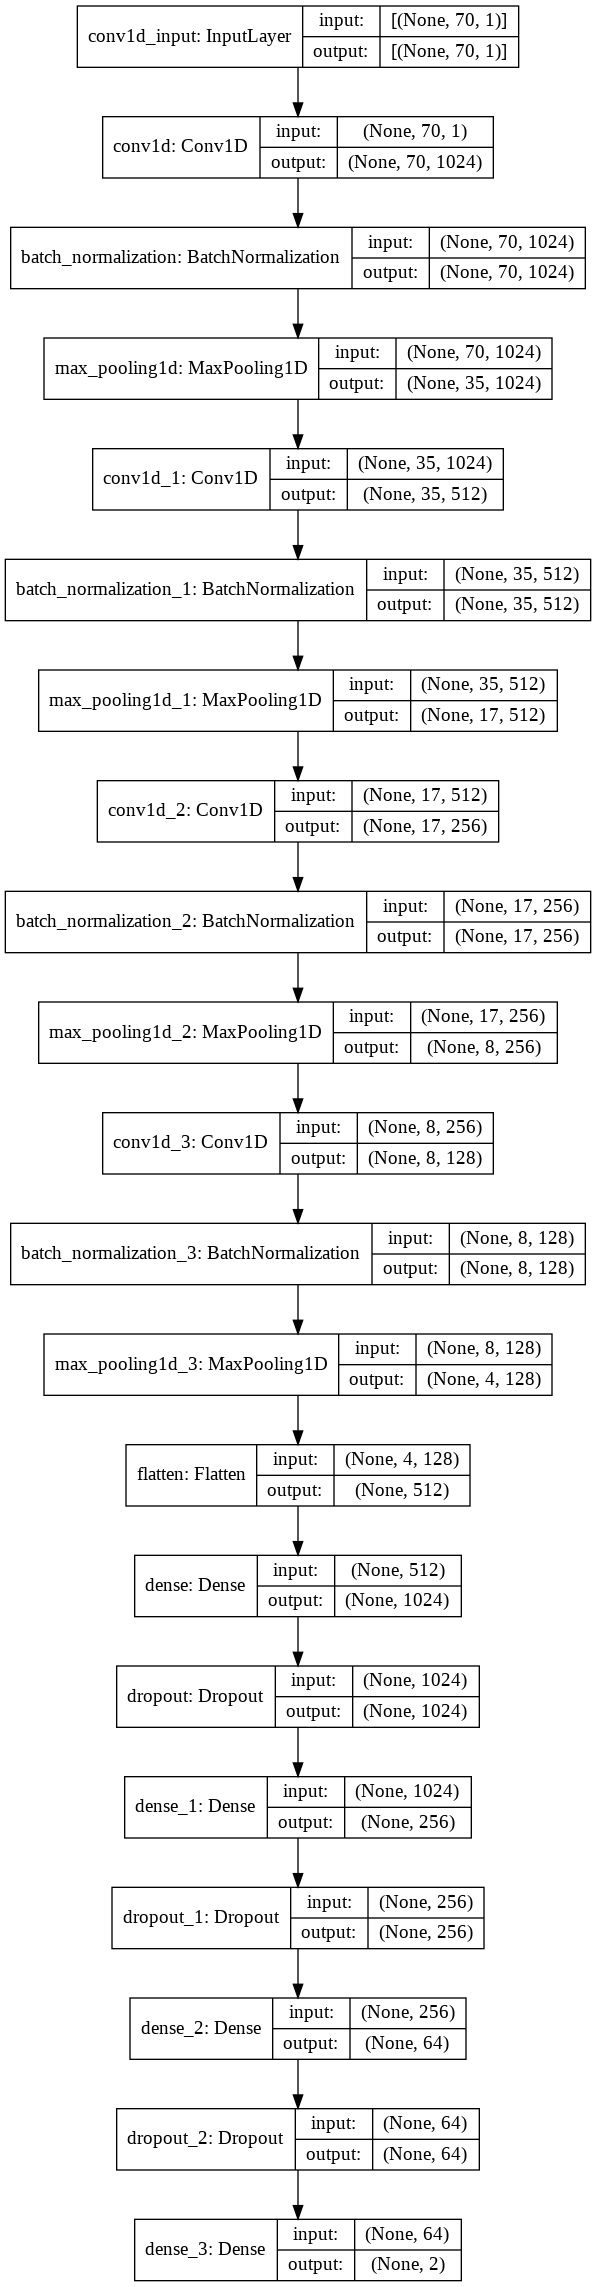

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Automatic save 

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/3rd_run/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=15)
callbacks_list = [es, checkpoint]

/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/3rd_run/weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks= callbacks_list)

Epoch 1/150
2135/2135 [==============================] - 197s 76ms/step - loss: 0.6101 - accuracy: 0.6649

Epoch 00001: accuracy improved from -inf to 0.69402, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-01-0.6940.hdf5
Epoch 2/150
2135/2135 [==============================] - 167s 78ms/step - loss: 0.4946 - accuracy: 0.7513

Epoch 00002: accuracy improved from 0.69402 to 0.76519, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-02-0.7652.hdf5
Epoch 3/150
2135/2135 [==============================] - 167s 78ms/step - loss: 0.3928 - accuracy: 0.8112

Epoch 00003: accuracy improved from 0.76519 to 0.82045, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-03-0.8204.hdf5
Epoch 4/150
2135/2135 [==============

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 15s 6ms/step - loss: 0.3034 - accuracy: 0.9663
Test loss: 0.3033607602119446
Test accuracy: 0.9663422107696533


In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-100-0.9958.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 14s 6ms/step - loss: 0.2782 - accuracy: 0.9634
Test loss: 0.2782038748264313
Test accuracy: 0.9633964896202087


In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-124-0.9966.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 14s 6ms/step - loss: 0.2491 - accuracy: 0.9660
Test loss: 0.24913150072097778
Test accuracy: 0.9659579992294312


In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-141-0.9970.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 14s 6ms/step - loss: 0.2291 - accuracy: 0.9658
Test loss: 0.22910979390144348
Test accuracy: 0.9657530784606934


In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-148-0.9971.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


2440/2440 [==============================] - 14s 6ms/step - loss: 0.2556 - accuracy: 0.9661
Test loss: 0.255574107170105
Test accuracy: 0.9660732746124268


In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-150-0.9972.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


2440/2440 [==============================] - 363s 149ms/step - loss: 0.3034 - accuracy: 0.9663
Test loss: 0.3033609986305237
Test accuracy: 0.9663422107696533


##Epoch 150 shows best accuracy confusion matrix and report for this is given below

In [ ]:
y_true = np.array(y_test)

y_pred = np.squeeze(model_loaded.predict(x_test))
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     32086
           1       0.97      0.97      0.97     45994

   micro avg       0.97      0.97      0.97     78080
   macro avg       0.97      0.97      0.97     78080
weighted avg       0.97      0.97      0.97     78080
 samples avg       0.97      0.97      0.97     78080



In [ ]:
from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_loaded.predict(x_test)
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array([0,1, 2, 3, 4, 5, 6, 7, 8,9])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Manual save 

Load model from a save point

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-150-0.9972.hdf5')

H = model_loaded.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks= callbacks_list)

Epoch 1/50
1708/1708 [==============================] - 142s 82ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0062 - val_accuracy: 0.9981

Epoch 00001: accuracy improved from -inf to 0.99686, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-01-0.9969.hdf5
Epoch 2/50
1708/1708 [==============================] - 145s 85ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0045 - val_accuracy: 0.9985

Epoch 00002: accuracy improved from 0.99686 to 0.99699, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/weights-improvement-02-0.9970.hdf5
Epoch 3/50
1708/1708 [==============================] - 145s 85ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0054 - val_accuracy: 0.9980

Epoch 00003: accuracy improved from 0.99699 to 0.99700, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoi

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/2nd_run/weights-improvement-10-0.9974.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 46s 6ms/step - loss: 0.2256 - accuracy: 0.9663
Test loss: 0.2256374955177307
Test accuracy: 0.9662653803825378


In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/2nd_run/weights-improvement-10-0.9974.hdf5')

H = model_loaded.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks= callbacks_list)

Epoch 1/50
1708/1708 [==============================] - 143s 83ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0126 - val_accuracy: 0.9956

Epoch 00001: accuracy improved from -inf to 0.99732, saving model to /content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Binary_Check_Point/Valance_Binary_Checkpoint/3rd_run/weights-improvement-01-0.9973.hdf5
Epoch 2/50
1708/1708 [==============================] - 141s 82ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.0118 - val_accuracy: 0.9962

Epoch 00002: accuracy did not improve from 0.99732
Epoch 3/50
1708/1708 [==============================] - 141s 82ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0161 - val_accuracy: 0.9951

Epoch 00003: accuracy did not improve from 0.99732
Epoch 4/50
1708/1708 [==============================] - 141s 82ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0191 - val_accuracy: 0.9941

Epoch 00004: accuracy improved from 0.99732 to 0.99736, saving model to /content/drive

In [ ]:
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 15s 6ms/step - loss: 0.2784 - accuracy: 0.9602
Test loss: 0.2784179151058197
Test accuracy: 0.9601946473121643


In [ ]:
N = num_classes
EPOCS = 120
# construct a plot that plots and saves the training history
import matplotlib.pyplot as plt
N = np.arange(0, EPOCS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss Graph")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.show()
#base_path_graphs = '/content/drive/My Drive/Google_Colab/Autoencoder/Graphs/'
#path_loss_acc = base_path_graphs + model_name + 'Train_loss_Val_loss.png'
#plt.savefig(base_path_graphs, dpi=1000, bbox_inches='tight')
#files.download( "Train_Accuracy.png" )

In [ ]:
N = num_classes
EPOCS = 120
# construct a plot that plots and saves the training history
import matplotlib.pyplot as plt
N = np.arange(0, EPOCS)
plt.style.use("bmh")
plt.figure()
plt.plot(N, H.history["accuracy"], label="Train_Accuracy")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Accuracy Graph")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])
plt.title('Training Loss & Training Accuracy graph')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])
plt.title('Training Loss & Training Accuracy graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [ ]:
from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[30175  1911]
 [ 1197 44797]]
Normalized confusion matrix
[[0.94 0.06]
 [0.03 0.97]]


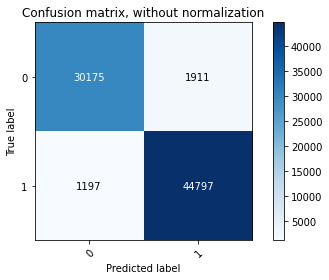

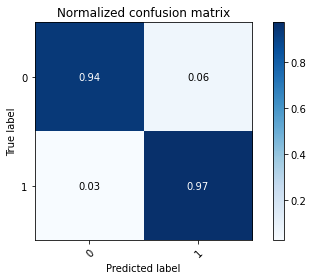

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_loaded.predict(x_test)
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array([0,1, 2, 3, 4, 5, 6, 7, 8,9])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [ ]:

y_true = np.array(y_test)

y_pred = np.squeeze(model_loaded.predict(x_test))
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     32086
           1       0.97      0.97      0.97     45994

   micro avg       0.97      0.97      0.97     78080
   macro avg       0.97      0.97      0.97     78080
weighted avg       0.97      0.97      0.97     78080
 samples avg       0.97      0.97      0.97     78080



In [ ]:

y_true = np.array(y_test)

y_pred = np.squeeze(model.predict(x_test))
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:

from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Copy_Valance_Check_point_2/weights-improvement-120-0.9857.hdf5')

H = model_loaded.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks= callbacks_list)

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/Thesis/DEAP-dataset/Saved_checkpoints_2/Copy_Valance_Check_point_2/weights-improvement-115-0.9854.hdf5')
score = model_loaded.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2440/2440 [==============================] - 10s 4ms/step - loss: 0.3202 - accuracy: 0.9388
Test loss: 0.3202463984489441
Test accuracy: 0.9387935400009155


In [ ]:
y_true = np.array(y_test)

y_pred = np.squeeze(model_loaded.predict(x_test))
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_loaded.predict(x_test)
y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array([0,1, 2, 3, 4, 5, 6, 7, 8,9])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()